В данной работе мы будем анализировать датасет задержек авиарейсов из Нью-Йорка в 2013 году. Нашей задачей будет исследовать, как погодные условия влияют на время вылета и прибытия для различных рейсов, описать причину задержки того или иного рейса и выявить основные факторы, вызывающие такие задержки. Такой отчет в сложных ситуациях мог бы способствовать принятию решений руководством аэропортов.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
url = 'https://raw.githubusercontent.com/vaibhavwalvekar/NYC-Flights-2013-Dataset-Analysis/master/flights.csv'
f = pd.read_csv(url)
f

,Unnamed: 0,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,1,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0
1,2,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0
2,3,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0
3,4,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576,5.0,44.0
4,5,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0
5,6,2013,1,1,554.0,-4.0,740.0,12.0,UA,N39463,1696,EWR,ORD,150.0,719,5.0,54.0
6,7,2013,1,1,555.0,-5.0,913.0,19.0,B6,N516JB,507,EWR,FLL,158.0,1065,5.0,55.0
7,8,2013,1,1,557.0,-3.0,709.0,-14.0,EV,N829AS,5708,LGA,IAD,53.0,229,5.0,57.0
8,9,2013,1,1,557.0,-3.0,838.0,-8.0,B6,N593JB,79,JFK,MCO,140.0,944,5.0,57.0
9,10,2013,1,1,558.0,-2.0,753.0,8.0,AA,N3ALAA,301,LGA,ORD,138.0,733,5.0,58.0


In [4]:
prl = 'weather.csv'
w = pd.read_csv(prl)
w.head(30)

,Unnamed: 0,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib
0,1,EWR,2013,1.0,1.0,0.0,37.04,21.92,53.97,230.0,10.35702,11.918651,0.0,1013.9,10.0
1,2,EWR,2013,1.0,1.0,1.0,37.04,21.92,53.97,230.0,13.80936,15.891535,0.0,1013.0,10.0
2,3,EWR,2013,1.0,1.0,2.0,37.94,21.92,52.09,230.0,12.65858,14.567241,0.0,1012.6,10.0
3,4,EWR,2013,1.0,1.0,3.0,37.94,23.00,54.51,230.0,13.80936,15.891535,0.0,1012.7,10.0
4,5,EWR,2013,1.0,1.0,4.0,37.94,24.08,57.04,240.0,14.96014,17.215830,0.0,1012.8,10.0
5,6,EWR,2013,1.0,1.0,6.0,39.02,26.06,59.37,270.0,10.35702,11.918651,0.0,1012.0,10.0
6,7,EWR,2013,1.0,1.0,7.0,39.02,26.96,61.63,250.0,8.05546,9.270062,0.0,1012.3,10.0
7,8,EWR,2013,1.0,1.0,8.0,39.02,28.04,64.43,240.0,11.50780,13.242946,0.0,1012.5,10.0
8,9,EWR,2013,1.0,1.0,9.0,39.92,28.04,62.21,250.0,12.65858,14.567241,0.0,1012.2,10.0
9,10,EWR,2013,1.0,1.0,10.0,39.02,28.04,64.43,260.0,12.65858,14.567241,0.0,1011.9,10.0


In [102]:
d = f.groupby('origin')['dep_delay'].mean().sort_values()[::-1]
print(d)

origin
EWR    15.107954
JFK    12.112159
LGA    10.346876
Name: dep_delay, dtype: float64


Таким образом, можно сделать вывод, что по времени задержек рейсов лидирует Newark International Airport. В среднем задержка составляет около 15 минут.


Text(0.5, 0, 'Среднее зачение задержек рейсов по месяцам')

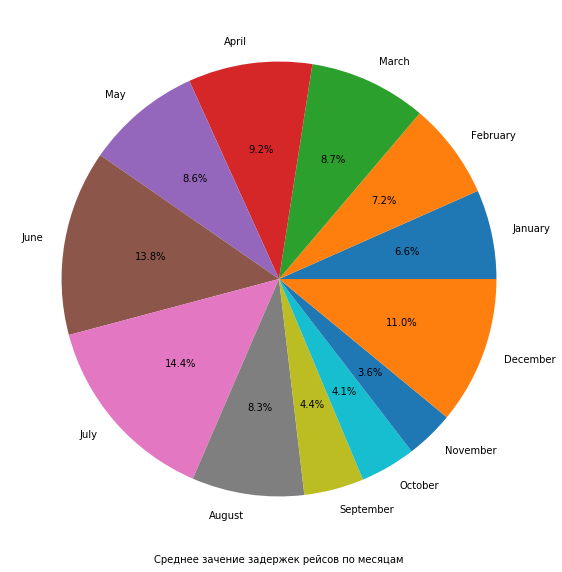

In [7]:
mean = f.groupby('month')['dep_delay'].mean()
l = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August','September', 'October', 'November', 'December']
plt.figure(figsize = (10,10))
plt.pie(mean, labels = l, autopct='%1.1f%%')
plt.xlabel('Среднее зачение задержек рейсов по месяцам')

Text(0.5, 1.0, 'Зависимость времени задержек вылета от месяца')

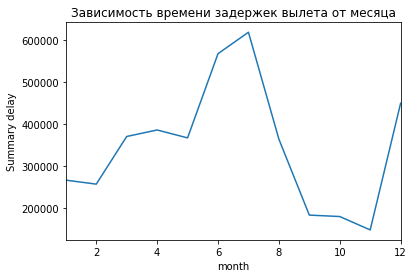

In [8]:
f.groupby('month')['dep_delay'].sum().plot()
plt.ylabel('Summary delay')
plt.title('Зависимость времени задержек вылета от месяца')

Text(0.5, 1.0, 'Зависимость средней температуры от месяца')

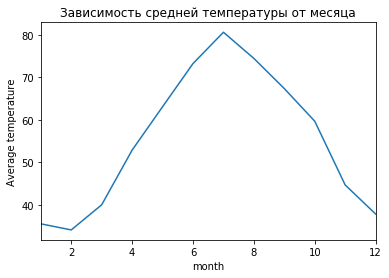

In [89]:
w.groupby('month')['temp'].mean().plot()
plt.ylabel('Average temperature')
plt.title('Зависимость средней температуры от месяца')

Проанализировав два данных графика, можно предположить, что значение температуры влияет на время задержек рейса. 
Это один из природных факторов, оказывающий влияние на работу аэропортов.

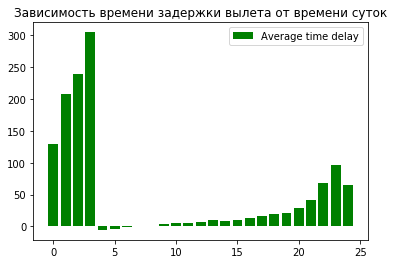

In [39]:
plt.bar(np.arange(25), f.groupby('hour')['dep_delay'].mean(), label = 'Average time delay', color = 'green')
plt.title('Зависимость времени задержки вылета от времени суток')
plt.legend()

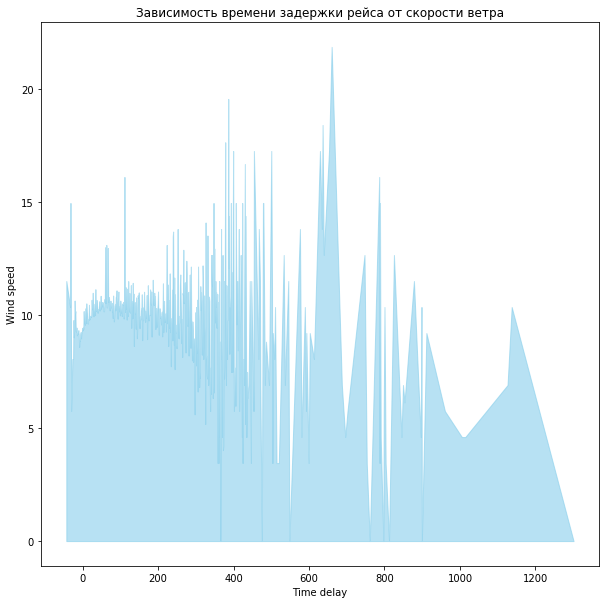

In [5]:
m = f.merge(w, on = ['hour', 'day', 'month'])
x = m['dep_delay'].drop_duplicates().sort_values()
y = m.groupby('dep_delay')['wind_speed'].mean()
plt.figure(figsize=(10,10))
plt.fill_between( x, y, color="skyblue", alpha=0.6)
plt.xlabel('Time delay')
plt.ylabel('Wind speed')
plt.title('Зависимость времени задержки рейса от скорости ветра')
plt.show()


Время задержки рейса меняется хаотично, однако при больших показателях скорости ветра время задержки рейса составляет в среднем от 400 до 800 минут.

Для удобства рассматриваем не все возможные направления 


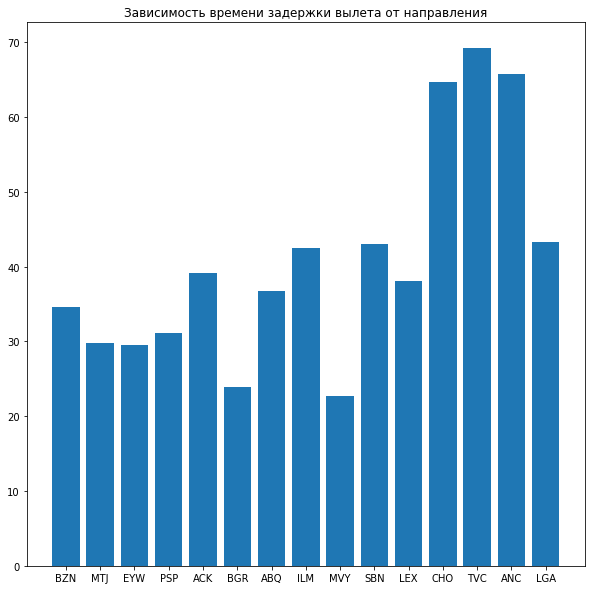

In [38]:
dest = f[f.dep_delay > 0].groupby('dest')['dep_delay'].mean()
plt.figure(figsize = (10,10))
plt.bar(np.arange(15), dest[88:])
plt.xticks(np.arange(15), ('BZN', 'MTJ', 'EYW', 'PSP', 'ACK', 'BGR', 'ABQ', 'ILM', 'MVY',
       'SBN', 'LEX', 'CHO', 'TVC', 'ANC', 'LGA'))
plt.title('Зависимость времени задержки вылета от направления')
print('Для удобства рассматриваем не все возможные направления ')
plt.show()

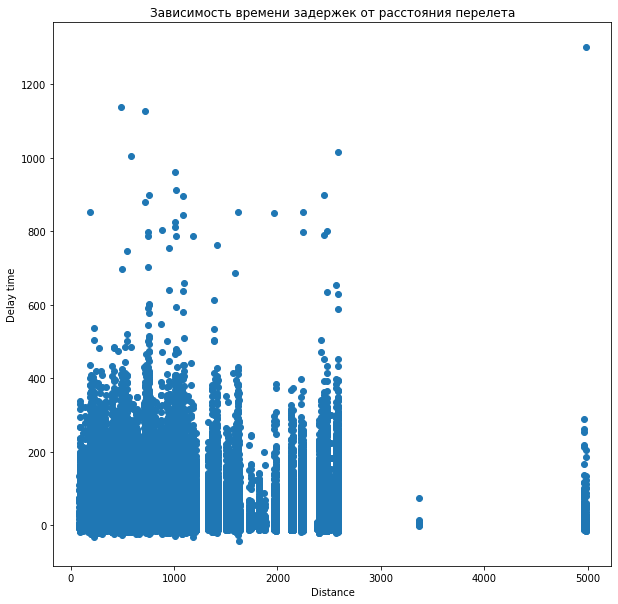

In [42]:
plt.figure(figsize=(10,10))
plt.scatter(f['distance'], f['dep_delay'])
plt.title('Зависимость времени задержек от расстояния перелета')
plt.xlabel('Distance')
plt.ylabel('Delay time')
plt.show()

Отсюда можно сделать вывод, что время задержки рейса не зависит от расстояния перелета.

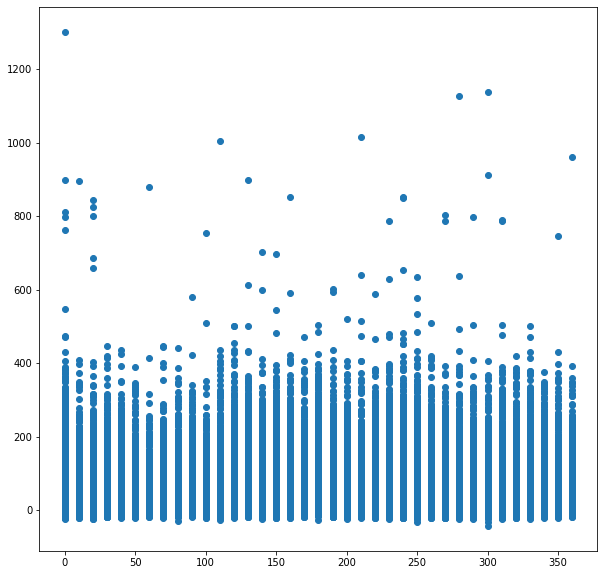

In [44]:
plt.figure(figsize = (10,10))
plt.scatter(m['wind_dir'], m['dep_delay'] )

Из графика видно, что время задержки рейса также не зависит от направления ветра

([<matplotlib.axis.XTick at 0x544fc88>,
 <a list of 16 Text xticklabel objects>)

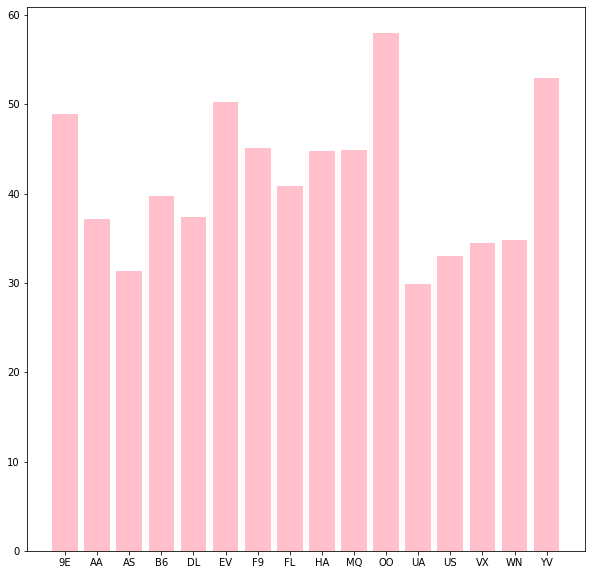

In [12]:
plt.figure(figsize=(10,10))
carrier = f[f.dep_delay > 0].groupby('carrier')['dep_delay'].mean()
plt.bar(np.arange(len(f['carrier'].unique())), carrier, color = 'pink')
plt.xticks(np.arange(len(f['carrier'].unique())), ('9E','AA','AS','B6','DL','EV','F9','FL','HA','MQ','OO','UA','US','VX','WN','YV'))

Лидером по задержкам по перевозчикам является ОО

Text(0, 0.5, 'Delay time')

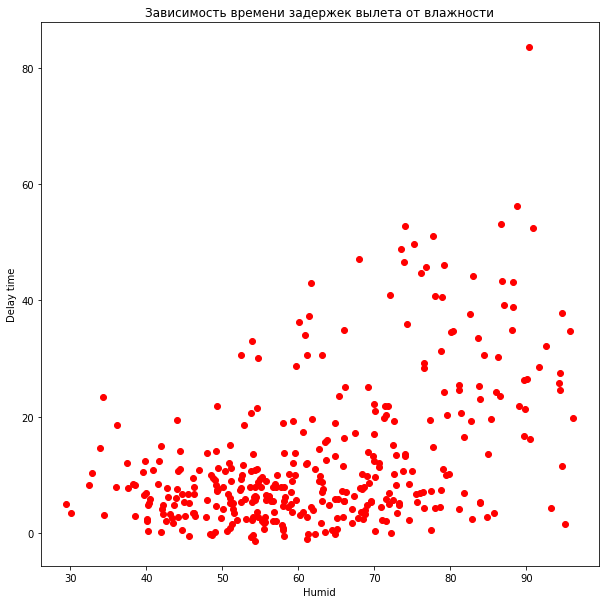

In [6]:
plt.figure(figsize=(10,10))
plt.scatter(m.groupby(['month','day'])['humid'].mean(), m.groupby(['month','day'])['dep_delay'].mean()[0:500], color = 'red')
plt.title('Зависимость времени задержек вылета от влажности')
plt.xlabel('Humid')
plt.ylabel('Delay time')

# Выводы

1.  По времени задержек рейсов лидирует Newark International Airport. В среднем задержка составляет около 15 минут.

2. Проанализировав графики зависимости суммарного времени задержек от месяца и темперауры от месяца , можно предположить, что значение температуры влияет на время задержек рейса, так как два данных графика достигали свой максимум в одном и том же месяце.

3. Самым "загруженным" месяцем является июль, вероятно такая статистика связана с тем, что в данном месяце были тяжелые погодные условия, и суммарное время задержек самолетов значительно увеличилось.

4. Проанализировав гистограмму, можно сделать вывод, что с утра время задержек вылета небольшое, но ближе к вечеру оно начинает увеличиваться и достигает своего максимума в 3 часа утра. Затем оно резко падает, что может быть связано с тем, что колчисетво ночных рейсов значитаельно меньше, чем дневных.

5. Время задержки рейса в зависимости от скорости ветра меняется хаотично, однако при больших показателях скорости ветра время задержки рейса составляет в среднем от 400 до 800 минут.

6. Наиболее "загруженным" направлением является TVC, в среднем время ожидания составляет около 70 минут. На самом деле, данное направление является самым "загруженным" среди всех направлений.

7. Время задержки рейса не зависит от расстояния перелета.

8. Время задержки рейса также не зависит от направления ветра.

9. Лидером по задержкам по перевозчикам является ОО. Среднее время задержки около 60 минут.

10. Зависимость времени задержки вылета от влажности следующая: при небольшой влажности время задержек меняется в маленьких пределах и в среднем не превышает 25 минут, при увеличении влажности амплитуда изменения времени задержек линейно растет.
